In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform

In [41]:
filename = '../result_time/5kt_+8.00.h5'
h = tables.open_file(filename,'r')
data = h.root.Recon[:]

Text(0.5, 1.0, '(0,0,8) m')

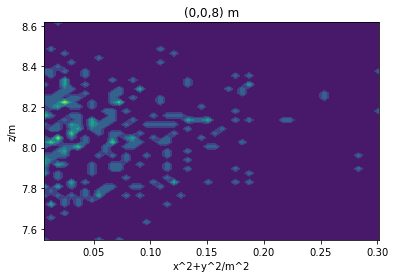

In [43]:
x = data[:]['x_sph']
y = data[:]['y_sph']
z = data[:]['z_sph']
#index =(~np.isnan(x)) & (np.abs(x)<1) &(np.abs(y)<1)
index =(~np.isnan(x))
H2, xedges, yedges = np.histogram2d(x[index]**2+y[index]**2,z[index], bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.log(np.transpose(H2)+1))
plt.xlabel('x^2+y^2/m^2')
plt.ylabel('z/m')
plt.title('(0,0,8) m')

In [45]:
print(np.sum(np.isnan(x)))

274


In [47]:
import sys
print(sys.executable)

/opt/gentoo/usr/bin/python3.6


[ 8.41479976e-01  9.71978246e-17 -3.10130259e-01]


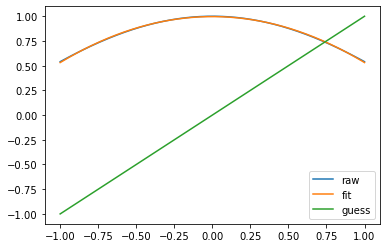

In [51]:
x = np.linspace(-1,1,1000)
y = np.cos(x)
plt.plot(x,y)
c = np.polynomial.legendre.legfit(x, y, 2)
print(c)
plt.plot(x, np.polynomial.legendre.legval(x,c))
plt.plot(x, np.polynomial.legendre.legval(x,[0,1,0]))
plt.legend(['raw','fit','guess'])